In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

### Chargement du fichier et création des y et x 

In [28]:
# Chargement des données
df = pd.read_csv("../Data/Partie_1_clean.csv")

# Création de la cible y (et petit encodage)
y = df['a_quitte_l_entreprise'].map({'Oui': 1, 'Non': 0})

# Création des features X
X = df.drop(columns=['a_quitte_l_entreprise'])

X.shape, y.shape


((1470, 28), (1470,))

### Création du Pairplot

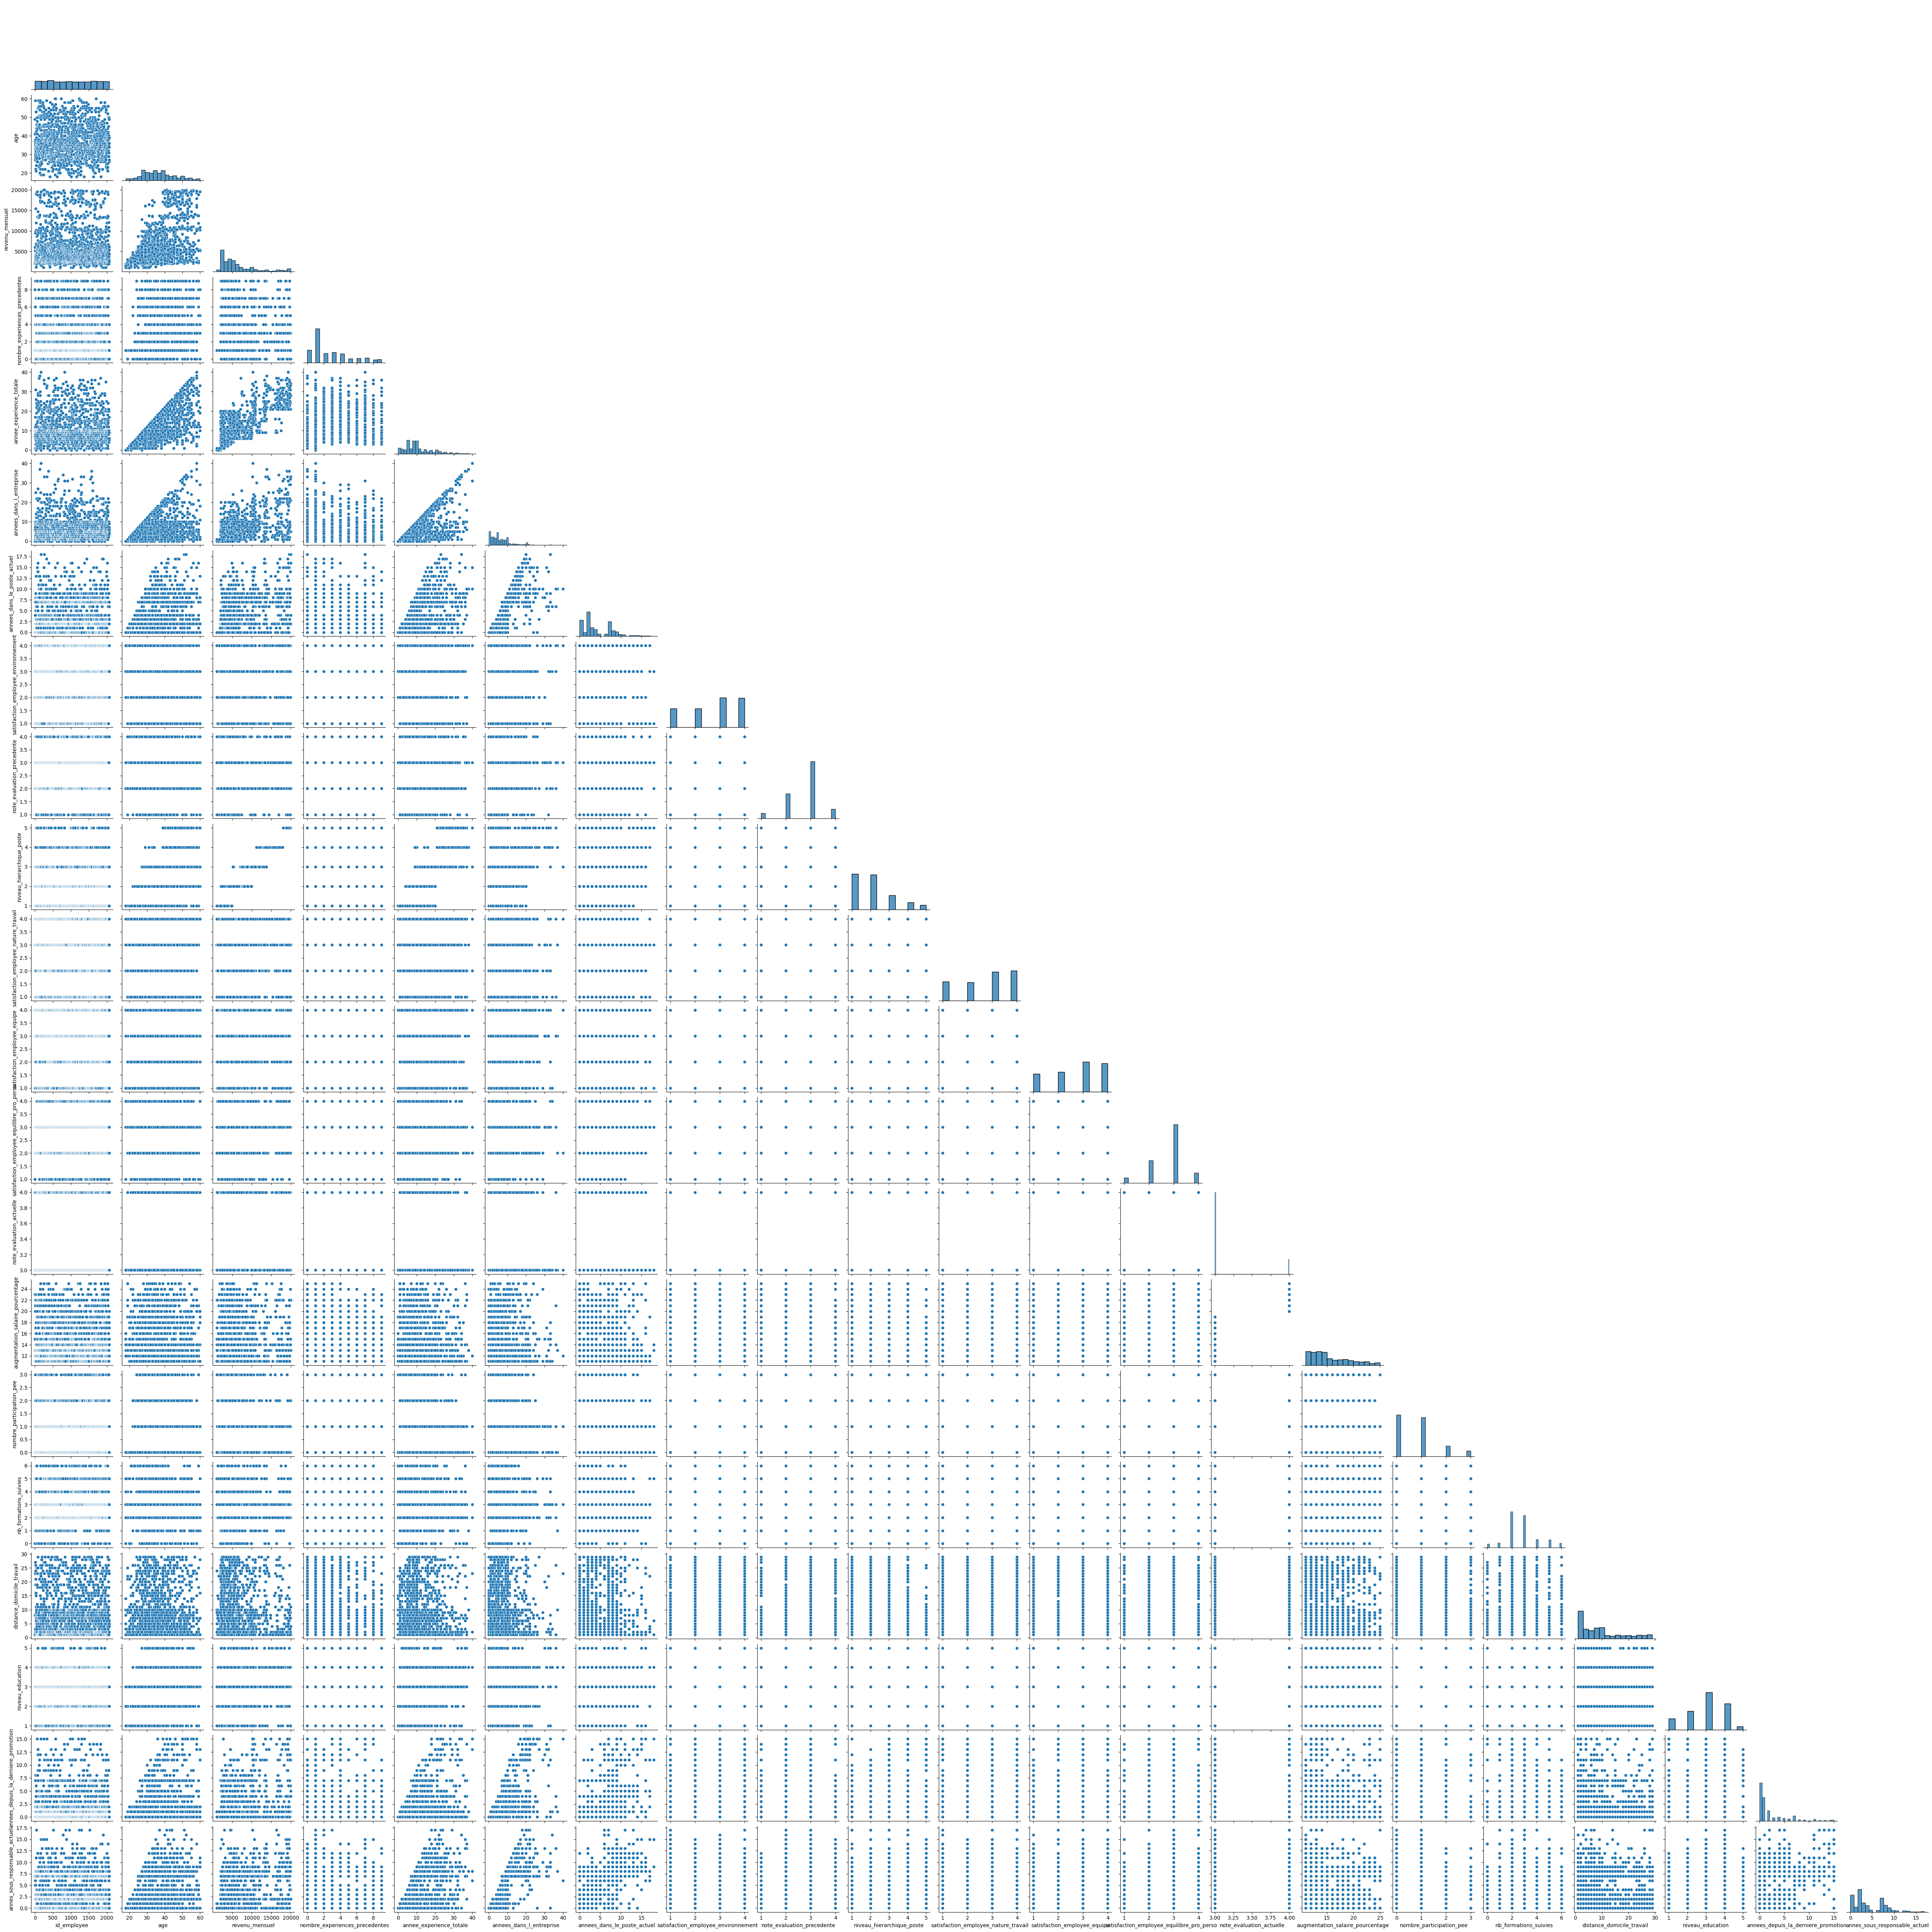

In [29]:
# Sélection des variables numériques
X_num = X.select_dtypes(include=['number'])

# 2. Pairplot
sns.pairplot(X_num, corner=True)
plt.show()

### Création de nouvelles Features

In [30]:
def creer_features_metier(df):
    
    # 1. Ratio Loyauté
    df['ratio_loyaute'] = df['annees_dans_l_entreprise'] / df['age']

    # 2. Ratio Stagnation (+1 pour éviter division par zéro)
    df['ratio_stagnation'] = df['annees_depuis_la_derniere_promotion'] / (df['annees_dans_l_entreprise'] + 1)

    # Ratio Salaire Comparatif
    moyenne_poste = df.groupby('poste')['revenu_mensuel'].transform('mean')
    df['ratio_salaire_comparatif'] = df['revenu_mensuel'] / moyenne_poste

    # Taux volatilité
    df['taux_volatilite'] = df['nombre_experiences_precedentes'] / (df['annee_experience_totale'] + 1)

    # Delta évaluation
    df['delta_evaluation'] = df['note_evaluation_actuelle'] - df['note_evaluation_precedente']

    # 3. Score de Frustration
    df['frustration_trajet'] = df['distance_domicile_travail'] / (df['satisfaction_employee_equilibre_pro_perso'] + 1)
    
    return df

# --- APPEL DE LA FONCTION ---
X = creer_features_metier(X)

nouvelles_features = [
    'ratio_loyaute', 
    'ratio_stagnation', 
    'ratio_salaire_comparatif', 
    'taux_volatilite', 
    'delta_evaluation', 
    'frustration_trajet'
]

print("Aperçu des nouvelles features créées :")
display(X[nouvelles_features].head())

Aperçu des nouvelles features créées :


,ratio_loyaute,ratio_stagnation,ratio_salaire_comparatif,taux_volatilite,delta_evaluation,frustration_trajet
0,0.146341,0.000000,0.865505,0.888889,0,0.50
1,0.204082,0.090909,1.583347,0.090909,2,2.00
2,0.000000,0.000000,0.645626,0.750000,1,0.50
3,0.242424,0.333333,0.897847,0.111111,0,0.75
4,0.074074,0.666667,1.071306,1.285714,0,0.50


### Encodeage Ordinal et OneHot

In [31]:

# Encodage Ordinal
# Ordre logique : Aucun (0) < Occasionnel (1) < Frequent (2)
mapping_deplacement = {
    'Aucun': 0,
    'Occasionnel': 1,
    'Frequent': 2
}
X['frequence_deplacement'] = X['frequence_deplacement'].map(mapping_deplacement)

# 3. Encodage OneHot
colonnes_a_encoder = [
    'genre', 
    'statut_marital', 
    'departement', 
    'poste', 
    'heure_supplementaires', 
    'domaine_etude'
]
X = pd.get_dummies(X, columns=colonnes_a_encoder, drop_first=True, dtype=int)

# 4. Vérification finale
print("Vérification des valeurs de deplacement (doit être 0, 1, 2) :")
print(X['frequence_deplacement'].value_counts())

print(f"\nDimensions finales de X : {X.shape}")
display(X.head())

Vérification des valeurs de deplacement (doit être 0, 1, 2) :
frequence_deplacement
1    1043
2     277
0     150
Name: count, dtype: int64

Dimensions finales de X : (1470, 47)


,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augmentation_salaire_pourcentage,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,ratio_loyaute,ratio_stagnation,ratio_salaire_comparatif,taux_volatilite,delta_evaluation,frustration_trajet,genre_M,statut_marital_Divorcé(e),statut_marital_Marié(e),departement_Consulting,departement_Ressources Humaines,poste_Cadre Commercial,poste_Consultant,poste_Directeur Technique,poste_Manager,poste_Représentant Commercial,poste_Ressources Humaines,poste_Senior Manager,poste_Tech Lead,heure_supplementaires_Oui,domaine_etude_Entrepreunariat,domaine_etude_Infra & Cloud,domaine_etude_Marketing,domaine_etude_Ressources Humaines,domaine_etude_Transformation Digitale
0,1,41,5993,8,8,6,4,2,3,2,4,1,1,3,11,0,0,1,2,1,0,5,0.146341,0.000000,0.865505,0.888889,0,0.50,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,2,49,5130,1,10,10,7,3,2,2,2,4,3,4,23,1,3,8,1,2,1,7,0.204082,0.090909,1.583347,0.090909,2,2.00,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4,37,2090,6,7,0,0,4,2,1,3,2,3,3,15,0,3,2,2,1,0,0,0.000000,0.000000,0.645626,0.750000,1,0.50,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,5,33,2909,1,8,8,7,4,3,1,3,3,3,3,11,0,3,3,4,2,3,0,0.242424,0.333333,0.897847,0.111111,0,0.75,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,7,27,3468,9,6,2,2,1,3,1,2,4,3,3,12,1,3,2,1,1,2,2,0.074074,0.666667,1.071306,1.285714,0,0.50,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
print(X.isna().sum()[X.isna().sum() > 0])

Series([], dtype: int64)


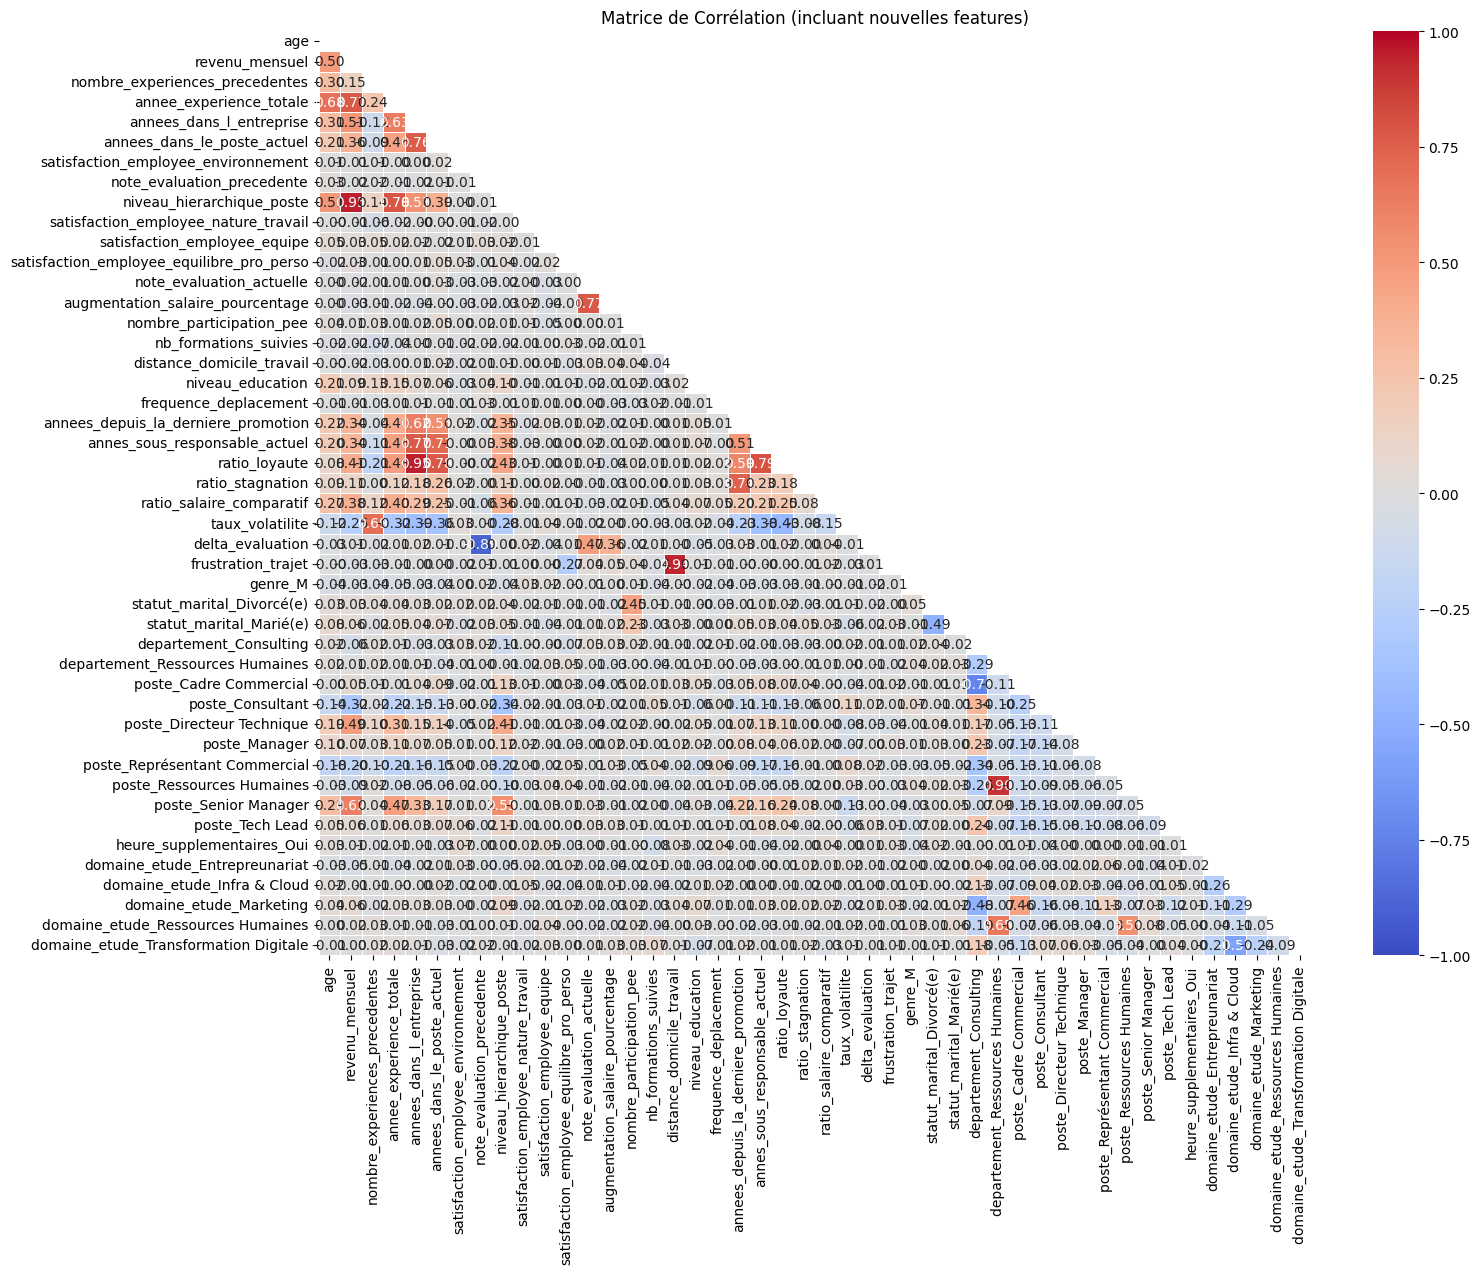

In [33]:
# Sélection des variables numériques uniquement

X_num = X.select_dtypes(include=['number'])

X_num = X_num.drop(columns=['id_employee'])
# Calcul de la matrice
corr_matrix = X_num.corr()

# Masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1,
            center=0,
            linewidths=0.5)
plt.title("Matrice de Corrélation (incluant nouvelles features)")
plt.show()

In [34]:
# Calcul de la corrélation et aplatissement de la matrice
corr = X.select_dtypes('number').corr().abs()

# On garde uniquement le triangle supérieur pour éviter les doublons (A-B vs B-A)
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
pairs = corr.where(mask).stack().sort_values(ascending=False)

print("--- Corrélations > 0.8 ---")
display(pairs[pairs > 0.8])

print("\n--- Corrélations > 0.7 ---")
display(pairs[pairs > 0.7])

--- Corrélations > 0.8 ---


revenu_mensuel                   niveau_hierarchique_poste    0.950300
annees_dans_l_entreprise         ratio_loyaute                0.949319
distance_domicile_travail        frustration_trajet           0.940081
departement_Ressources Humaines  poste_Ressources Humaines    0.904983
note_evaluation_precedente       delta_evaluation             0.894603
dtype: float64


--- Corrélations > 0.7 ---


revenu_mensuel                       niveau_hierarchique_poste           0.950300
annees_dans_l_entreprise             ratio_loyaute                       0.949319
distance_domicile_travail            frustration_trajet                  0.940081
departement_Ressources Humaines      poste_Ressources Humaines           0.904983
note_evaluation_precedente           delta_evaluation                    0.894603
annes_sous_responsable_actuel        ratio_loyaute                       0.792829
annee_experience_totale              niveau_hierarchique_poste           0.782208
annees_dans_le_poste_actuel          ratio_loyaute                       0.778123
note_evaluation_actuelle             augmentation_salaire_pourcentage    0.773550
revenu_mensuel                       annee_experience_totale             0.772893
annees_dans_l_entreprise             annes_sous_responsable_actuel       0.769212
                                     annees_dans_le_poste_actuel         0.758754
annees_depuis_la

### On supprime les trop corrélées ou redondance

In [35]:
to_drop = [
    'niveau_hierarchique_poste',
    'departement_Ressources Humaines',  # Redondance avec le poste
    'annees_dans_l_entreprise',          # Redondance avec le ratio_loyaute
    'distance_domicile_travail',          
    'annees_depuis_la_derniere_promotion',
    
    
]


cols_to_drop_final = [col for col in to_drop if col in X.columns]

X = X.drop(columns=cols_to_drop_final)

Export pour la suite

In [36]:
X.to_csv("../Data/X.csv", index=False)
y.to_csv("../Data/y.csv", index=False)